In [2]:
from unstructured.partition.pdf import partition_pdf
from unstructured.documents.elements import Element, Text, Image, FigureCaption

In [3]:
# PDF url - https://arxiv.org/pdf/2312.10997
base_dir = "files"
pdf_file_name = "2312.10997v5.pdf"

pdf_file_path = f"{base_dir}/{pdf_file_name}"

### Absolute Raw Text Extraction

In [13]:
raw_chunks = partition_pdf(
    filename=pdf_file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_image_block_types=["Image", "Figure", "Table"],
    extract_image_block_to_payload=True,
    chunking_strategy=None,
)

raw_chunks

Every next element to an `Image` element is a `FigureCaption` of that `Image`

In [14]:
# Print the indices of chunks that are images
all_image_indices = []
for idx, chunk in enumerate(raw_chunks):
    if isinstance(chunk, Image):
        all_image_indices.append(idx)
        print(idx)

32
45
59
241
305
410


### Image Parsing - Image Captioning

In [15]:
# Print the first image chunk as a dictionary
first_image_chunk_idx = all_image_indices[0]
raw_chunks[first_image_chunk_idx].to_dict()

{'type': 'Image',
 'element_id': 'b58021384db2bfcaac7de3da0f6b24cb',
 'text': 'Fine-tuning 2023 Retrieval—Augmented Generation Pre-training Inference RADA Retro++',
 'metadata': {'coordinates': {'points': ((np.float64(243.10555555555555),
     np.float64(155.7240000000001)),
    (np.float64(243.10555555555555), np.float64(1028.3555555555556)),
    (np.float64(1456.865), np.float64(1028.3555555555556)),
    (np.float64(1456.865), np.float64(155.7240000000001))),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-06-14T08:33:43',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 2,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANoBL4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRB

In [16]:
# Print the chunk very next to the first image chunk as a dictionary
first_figure_caption_idx = first_image_chunk_idx + 1
raw_chunks[first_figure_caption_idx].to_dict()

{'type': 'FigureCaption',
 'element_id': 'bd4bc2803805b042c7b9b6085d317bc3',
 'text': 'Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.',
 'metadata': {'detection_class_prob': 0.8932824730873108,
  'coordinates': {'points': ((np.float64(133.66278076171875),
     np.float64(1060.8123377777779)),
    (np.float64(133.66278076171875), np.float64(1157.670948888889)),
    (np.float64(1573.9967041015625), np.float64(1157.670948888889)),
    (np.float64(1573.9967041015625), np.float64(1060.8123377777779))),
   'system'

In [17]:
# Extract images and their captions from the raw chunks
all_images = []

for idx, chunk in enumerate(raw_chunks):
    if isinstance(chunk, Image):
        # check idx + 1 is figure caption
        if idx + 1 < len(raw_chunks) and isinstance(raw_chunks[idx + 1], FigureCaption):
            caption = raw_chunks[idx + 1].text
        else:
            caption = None

        all_images.append({
            "index": idx,
            "caption": caption if caption else "No caption",
            "image_text": chunk.text,
            "base64_image": chunk.metadata.image_base64,
        })

In [18]:
all_images[0]

{'index': 32,
 'caption': 'Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.',
 'image_text': 'Fine-tuning 2023 Retrieval—Augmented Generation Pre-training Inference RADA Retro++',
 'base64_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANoBL4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBR

In [19]:
import base64
from IPython.display import display, Image as IPImage
from pprint import pprint

# Function to display an image from base64 data
def display_image(image_base64):
    image_data = base64.b64decode(image_base64)
    display(IPImage(data=image_data, format='png', height=300, width=300))

('Index: 32, Caption: Fig. 1. Technology tree of RAG research. The stages of '
 'involving RAG mainly include pre-training, fine-tuning, and inference. With '
 'the emergence of LLMs, research on RAG initially focused on leveraging the '
 'powerful in context learning abilities of LLMs, primarily concentrating on '
 'the inference stage. Subsequent research has delved deeper, gradually '
 'integrating more with the fine-tuning of LLMs. Researchers have also been '
 'exploring ways to enhance language models in the pre-training stage through '
 'retrieval-augmented techniques.')


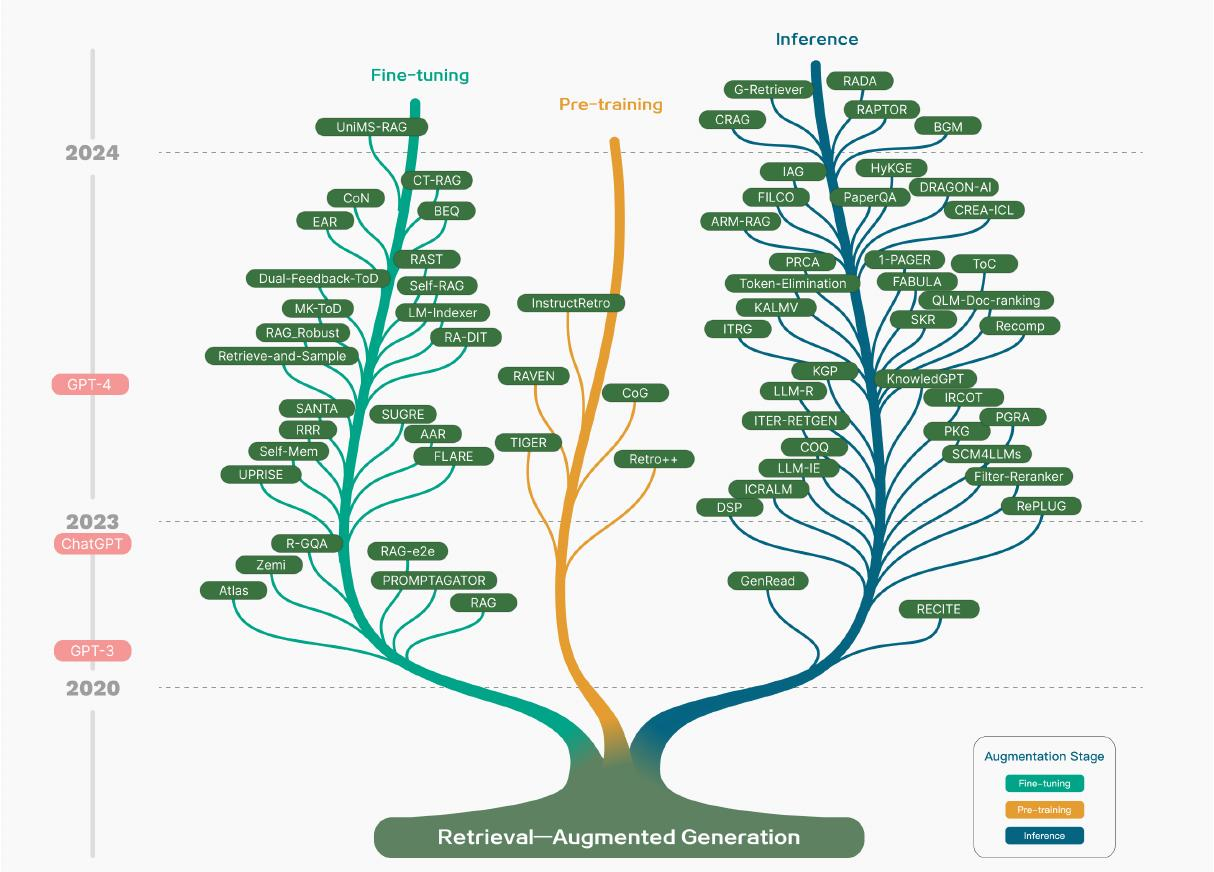

('Index: 45, Caption: Fig. 2. A representative instance of the RAG process '
 'applied to question answering. It mainly consists of 3 steps. 1) Indexing. '
 'Documents are split into chunks, encoded into vectors, and stored in a '
 'vector database. 2) Retrieval. Retrieve the Top k chunks most relevant to '
 'the question based on semantic similarity. 3) Generation. Input the original '
 'question and the retrieved chunks together into LLM to generate the final '
 'answer.')


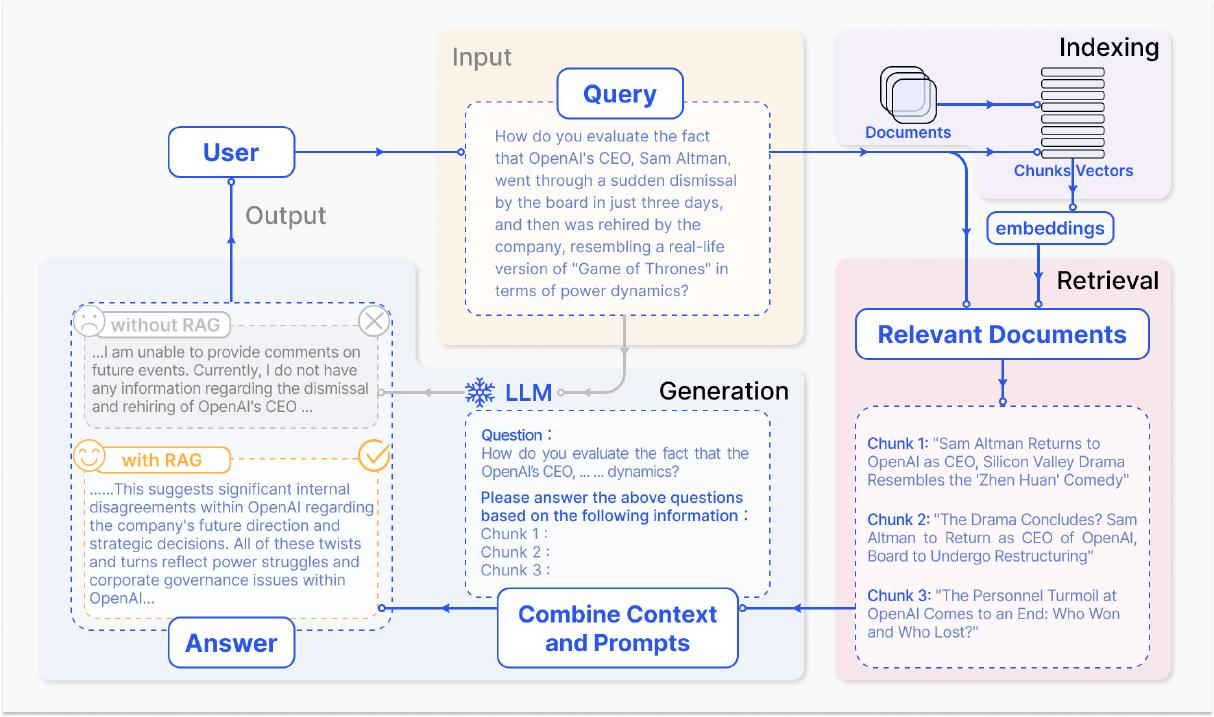

('Index: 59, Caption: Fig. 3. Comparison between the three paradigms of RAG. '
 '(Left) Naive RAG mainly consists of three parts: indexing, retrieval and '
 'generation. (Middle) Advanced RAG proposes multiple optimization strategies '
 'around pre-retrieval and post-retrieval, with a process similar to the Naive '
 'RAG, still following a chain-like structure. (Right) Modular RAG inherits '
 'and develops from the previous paradigm, showcasing greater flexibility '
 'overall. This is evident in the introduction of multiple specific functional '
 'modules and the replacement of existing modules. The overall process is not '
 'limited to sequential retrieval and generation; it includes methods such as '
 'iterative and adaptive retrieval.')


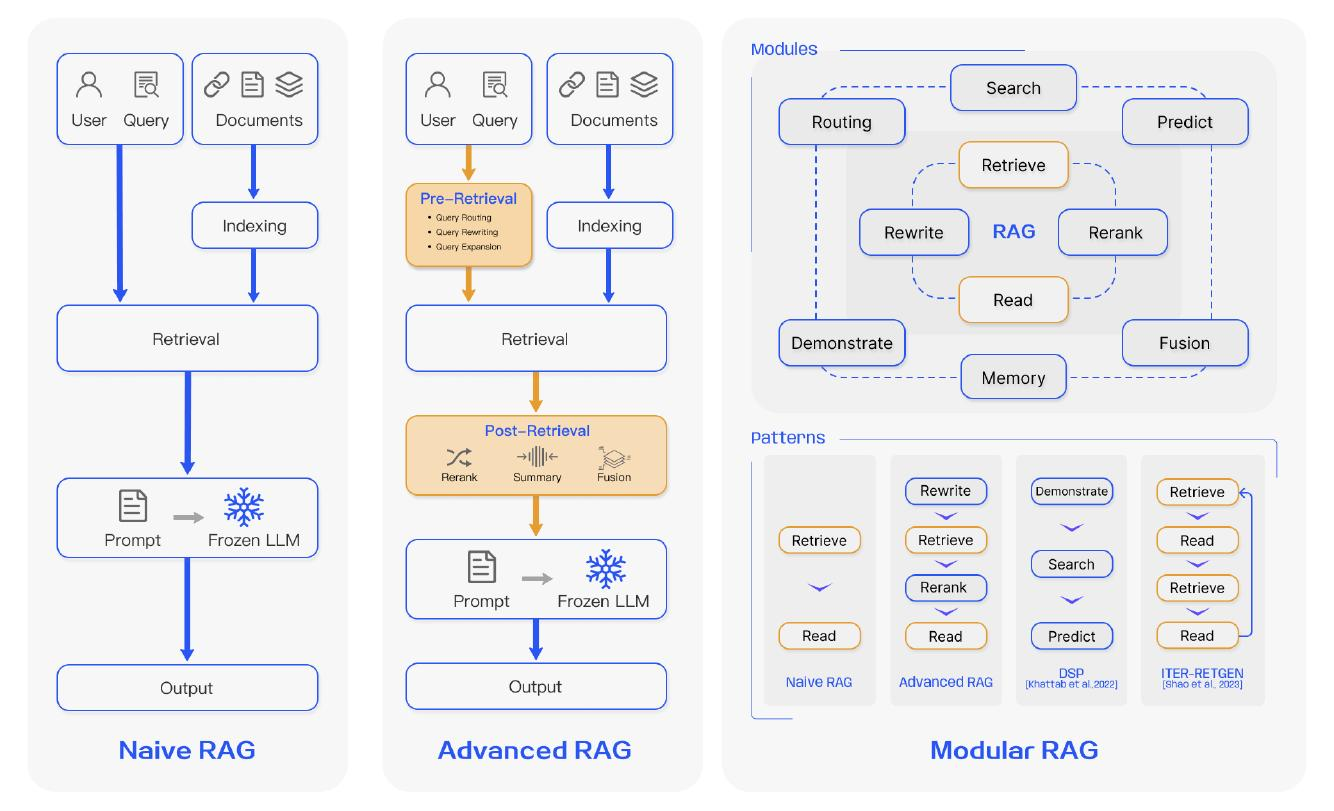

('Index: 241, Caption: Fig. 4. RAG compared with other model optimization '
 'methods in the aspects of “External Knowledge Required” and “Model Adaption '
 'Required”. Prompt Engineering requires low modifications to the model and '
 'external knowledge, focusing on harnessing the capabilities of LLMs '
 'themselves. Fine-tuning, on the other hand, involves further training the '
 'model. In the early stages of RAG (Naive RAG), there is a low demand for '
 'model modifications. As research progresses, Modular RAG has become more '
 'integrated with fine-tuning techniques.')


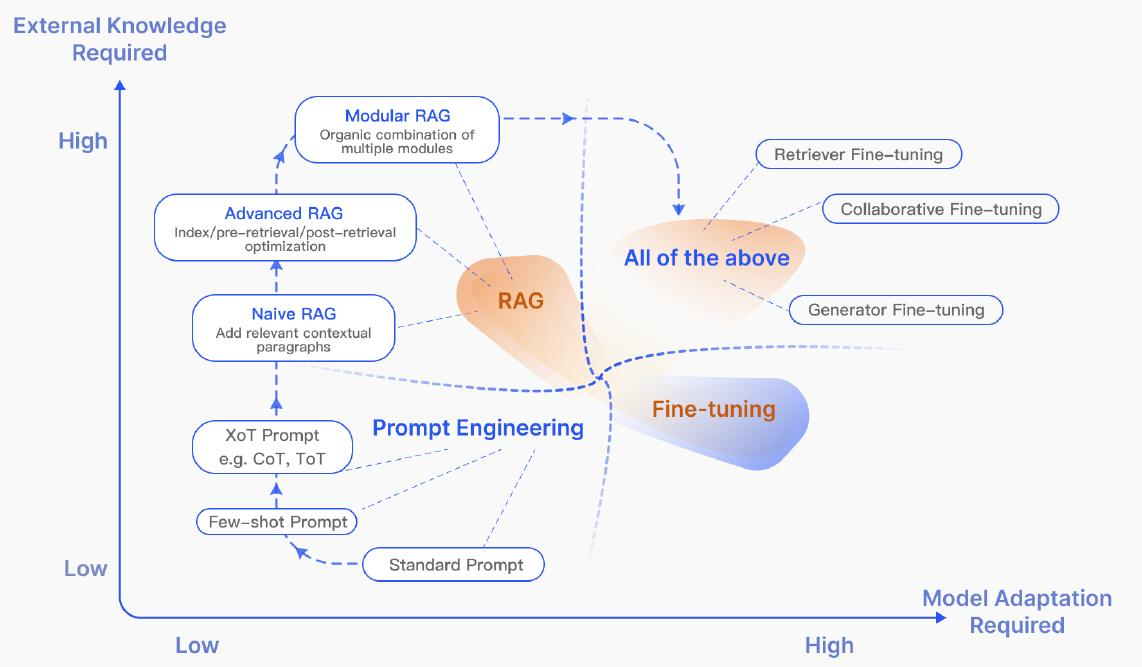

('Index: 305, Caption: Fig. 5. In addition to the most common once retrieval, '
 'RAG also includes three types of retrieval augmentation processes. (left) '
 'Iterative retrieval involves alternating between retrieval and generation, '
 'allowing for richer and more targeted context from the knowledge base at '
 'each step. (Middle) Recursive retrieval involves gradually refining the user '
 'query and breaking down the problem into sub-problems, then continuously '
 'solving complex problems through retrieval and generation. (Right) Adaptive '
 'retrieval focuses on enabling the RAG system to autonomously determine '
 'whether external knowledge retrieval is necessary and when to stop retrieval '
 'and generation, often utilizing LLM-generated special tokens for control.')


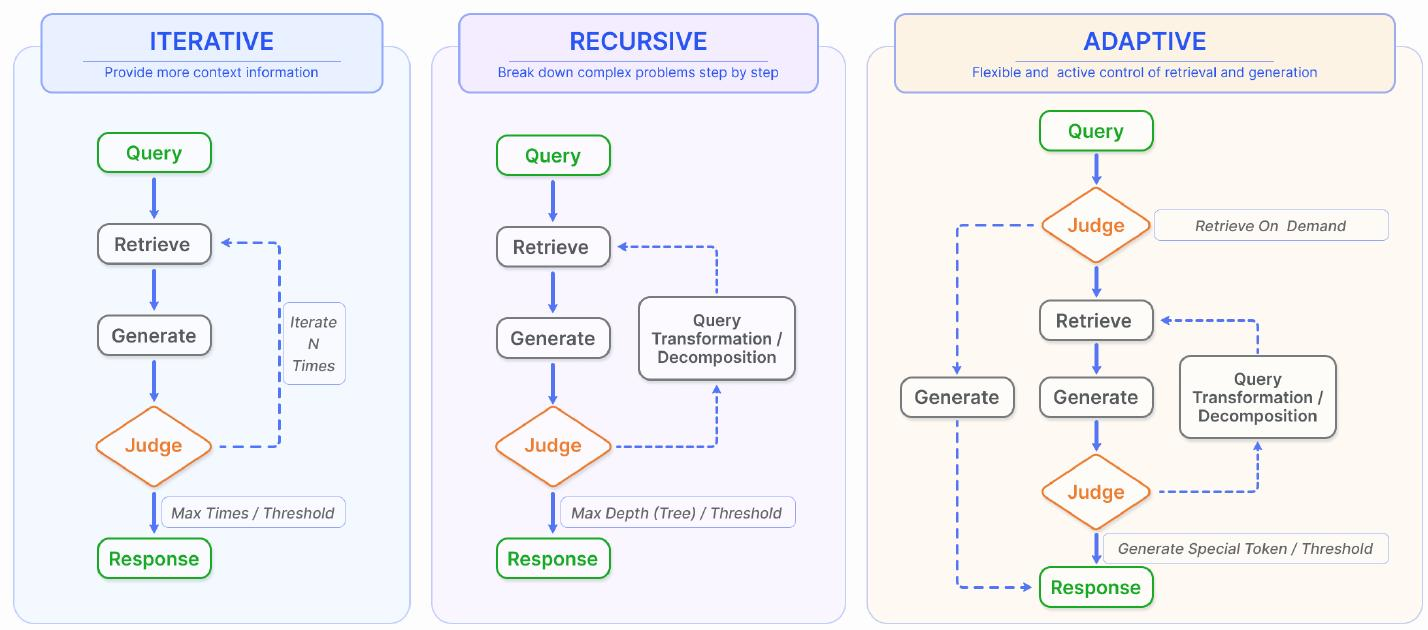

'Index: 410, Caption: Fig. 6. Summary of RAG ecosystem'


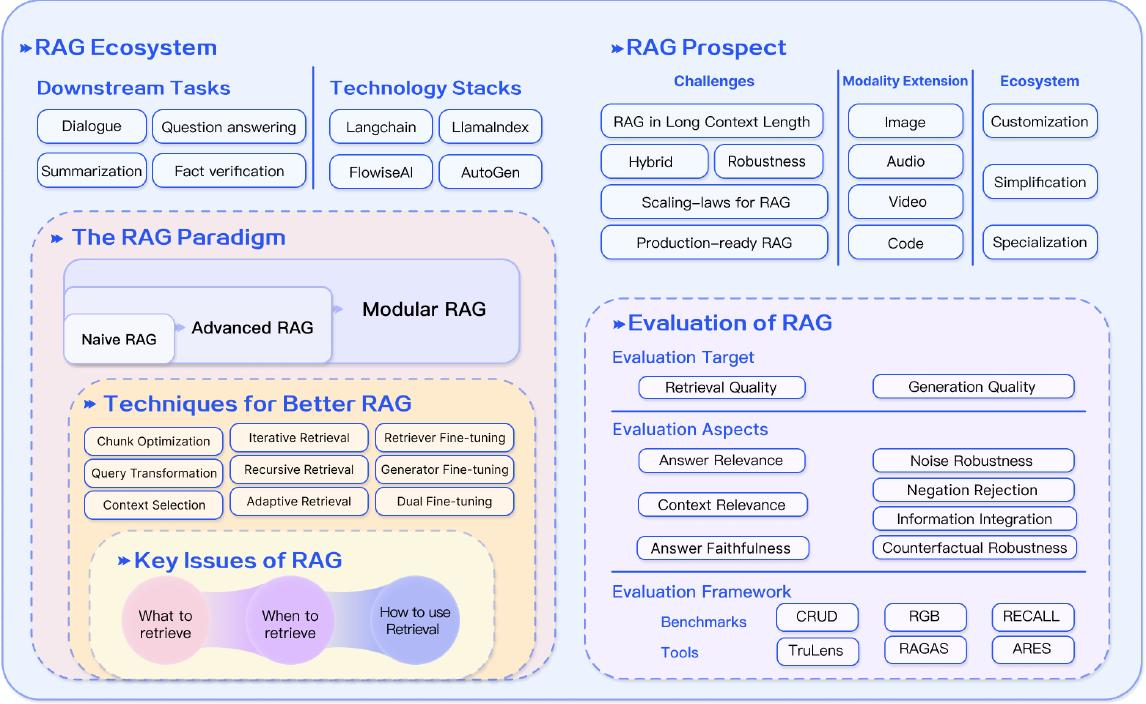

In [20]:
# Display all images with their captions
for image_data in all_images:
    pprint(f"Index: {image_data['index']}, Caption: {image_data['caption']}")
    display_image(image_data["base64_image"])

### Image Captioning

In [21]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("GEMINI_API_KEY")
if not api_key:
    raise ValueError("GEMINI_API_KEY is not set in the environment variables.")

In [22]:
import google.generativeai as genai
genai.configure(api_key=api_key)


# Function to generate a detailed description of an image using Gemini AI
def generate_image_description(image_data):
    model = genai.GenerativeModel("gemini-1.5-flash") 

    image_binary = base64.b64decode(image_data["base64_image"])

    prompt = (
        f"Describe the image in detail. The caption is: {image_data['caption']}."
        f"The image text is: {image_data['image_text']}" 
        f"Directly analyze the image and provide a detailed description without any additional text."
    )

    response = model.generate_content([
        prompt,
        {"mime_type": "image/png", "data": image_binary},
    ])

    return response.text

In [25]:
# Generate and print the description for the first image
print(generate_image_description(all_images[0]))  

The image is a technology tree diagram visualizing the research landscape of Retrieval-Augmented Generation (RAG). 


The tree's trunk is labeled "Retrieval-Augmented Generation" and branches into three main sections, representing the stages of RAG: Pre-training, Fine-tuning, and Inference.


The "Pre-training" branch (orange) originates around 2020 and extends upwards, showcasing various models and techniques developed for enhancing language models in the pre-training phase through retrieval-augmented methods. The names of specific models are listed along the branches.


The "Fine-tuning" branch (teal) also starts around 2020 but grows more extensively, illustrating the progression of research focusing on improving LLMs through fine-tuning with RAG techniques.  Again, numerous model names are present.


The "Inference" branch (dark teal) is the largest and most densely populated, reflecting the initial concentration of RAG research on leveraging LLMs' in-context learning for inference

### Table Parsing

In [26]:
from unstructured.documents.elements import Table

# Extract tables from the raw chunks
table_data = []
for idx, element in enumerate(raw_chunks):
    if isinstance(element, Table):
        table_data.append({
            "table_as_html": element.metadata.text_as_html,
        })

In [29]:
# Print the first table data
pprint(table_data[0])  

{'table_as_html': '<table><thead><tr><th></th><th>. Retrieval '
                  'Source</th><th>Retrieval Data Type</th><th>Retrieval . '
                  'Granularity</th><th>Augmentation '
                  'Stage</th></tr></thead><tbody><tr><td></td><td>Wikipedia</td><td>Text</td><td>Phrase</td><td>Pre-training</td></tr><tr><td></td><td>FactoidWiki</td><td>Text</td><td>Proposition</td><td>Inference</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Search '
                  'Engine, '
                  'Wikipedia</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td></td><td>Wikipedia</td><td>Text</td><td>Sentence</td><td>Inference</td></tr><tr><td></td><td>Wikipedi

In [32]:
from IPython.display import display, HTML

# Display the first table's HTML representation
def display_table_as_html(table_html):
    display(HTML(table_html))

display_table_as_html(table_data[0]["table_as_html"]) 

,. Retrieval Source,Retrieval Data Type,Retrieval . Granularity,Augmentation Stage
,Wikipedia,Text,Phrase,Pre-training
,FactoidWiki,Text,Proposition,Inference
,Dataset-base,Text,Sentence,Tuning
,Dataset-base,Text,Sentence,Tuning
,Dataset-base,Text,Sentence,Tuning
,Dataset-base,Text,Sentence,Tuning
,"Search Engine, Wikipedia",Text,Sentence,Tuning
,Wikipedia,Text,Sentence,Inference
,Wikipedia,Text,Sentence,Inference
,Dataset-base,Text,Sentence,Inference


In [33]:
# Genereate table description using Gemini
def generate_table_description(table_html):
    model = genai.GenerativeModel("gemini-1.5-flash") 

    prompt = (
        "Analyze the following table and provide a detailed description of its contents, "
        "including the structure, key data points, and any notable trends or insights."
        f"Here is the table in HTML format: {table_html}"
        "Directly analyze the table and provide a detailed description without any additional text."
    )

    response = model.generate_content([prompt])
    return response.text


In [34]:
print(generate_table_description(table_data[1]["table_as_html"]))  # Example usage with the second table

The table categorizes various question answering (QA) and natural language processing (NLP) datasets.  It's structured hierarchically, grouping datasets by task type.

**Key Data Points:**  Each row represents a task category (e.g., Single-hop QA, Multi-hop QA) or a specific dataset (e.g., SQuAD, HotpotQA).  Dataset names are listed, often with bracketed citations or identifiers (e.g., "[111]").  The number of datasets per category varies considerably.

**Notable Trends/Insights:**

* **Hierarchy of QA complexity:** The table progresses from simpler single-hop QA tasks to more complex tasks involving multi-hop reasoning, long-form answers, domain-specific knowledge, graph-based reasoning, dialog generation, and various other NLP tasks.
* **Dataset Abundance:**  Some categories (like single-hop QA) have numerous datasets, suggesting a greater focus on this area of research, while others (like Commonsense Reasoning) have fewer entries.
* **Task Diversity:** The breadth of tasks covered h

In [35]:
# Generate Table Summary using Ollama - Local Model Serving
import requests


def generate_table_summary(table_html):
    url = "http://localhost:11434/api/generate"
    data = {
        "model": "deepseek-r1:1.5b",
        "prompt": (
            "Analyze the following table and provide a detailed summary of its contents, "
            "including the structure, key data points, and any notable trends or insights."
            f"Here is the table in HTML format: {table_html}"
            "Directly analyze the table and provide a detailed summary without any additional text."
        ),
        "max_tokens": 1000,
        "stream": False,
        "temperature": 0.7,
    }

    response = requests.post(url, json=data)
    response.raise_for_status()
    return response.json().get("response", "No response from model")

In [70]:
print(generate_table_summary(table_data[1]["table_as_html"]))  # Example usage with the second table

<think>
Alright, I'm looking at this user query where they want me to analyze an HTML table provided in JSON format. The table seems to be about different question answering systems or models. My task is to parse the table, extract key data points, structure it, and provide a detailed summary without any additional text.

First, I need to understand the structure of the HTML table. It's wrapped in <table> tags with rows and cells. Each row starts with <tr> and has multiple <td> elements or non-td elements like <strong>, <em>, etc., which indicate headings. The headers are "Single-hop" and "Multi-hop", each containing subheaders.

I should identify the header section: two main sections under single-hop and multi-hop. Each of these has several question types listed with their respective formats and maybe more details in parentheses.

For example, Single-hop includes NQ, TriviaQA, SQuAD, PopQa, and MS MARCO. The first two have numbers indicating the format or version (like 111 for NQ). Tr

### Text Parsing - Semantic Chunking using title

In [ ]:
text_chunks = partition_pdf(
    filename=pdf_file_path,
    strategy="hi_res",
    chunking_strategy="by_title",
    max_characters=2000,
    combine_text_under_n_chars=500,
    new_after_n_chars=1500
)

text_chunks[:30]  # Display the first 30 text chunks

In [40]:
from unstructured.documents.elements import CompositeElement

for idx, chunk in enumerate(text_chunks):
    if isinstance(chunk, CompositeElement):
        print(f"Chunk {idx}: {chunk.text[:50]}...")  # Print first 50 characters of each chunk

Chunk 0: 4

2024

2

0

2 r a M 7 2 ] L C . s c [ 5 v 7 9 9...
Chunk 1: Index Terms—Large language model, retrieval-augmen...
Chunk 2: The burgeoning field of RAG has experienced swift ...
Chunk 3: Corresponding Author.Email:haofen.wang@tongji.edu....
Chunk 4: II. OVERVIEW OF RAG

A typical application of RAG ...
Chunk 5: A. Naive RAG

The Naive RAG research paradigm repr...
Chunk 6: widespread adoption of ChatGPT. The Naive RAG foll...
Chunk 7: However, Naive RAG encounters notable drawbacks:

...
Chunk 8: B. Advanced RAG

Advanced RAG introduces specific ...
Chunk 9: Pre-retrieval process. In this stage, the primary ...
Chunk 10: The modular RAG architecture advances beyond the f...
Chunk 11: aligns the text more closely with data distributio...
Chunk 12: Innovations such as the Rewrite-Retrieve-Read [7]m...
Chunk 13: D. RAG vs Fine-tuning

The augmentation of LLMs ha...
Chunk 14: In multiple evaluations of their performance on va...
Chunk 15: III. RETRIEVAL

In the context of RAG, i